FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/all_forecasts.png'

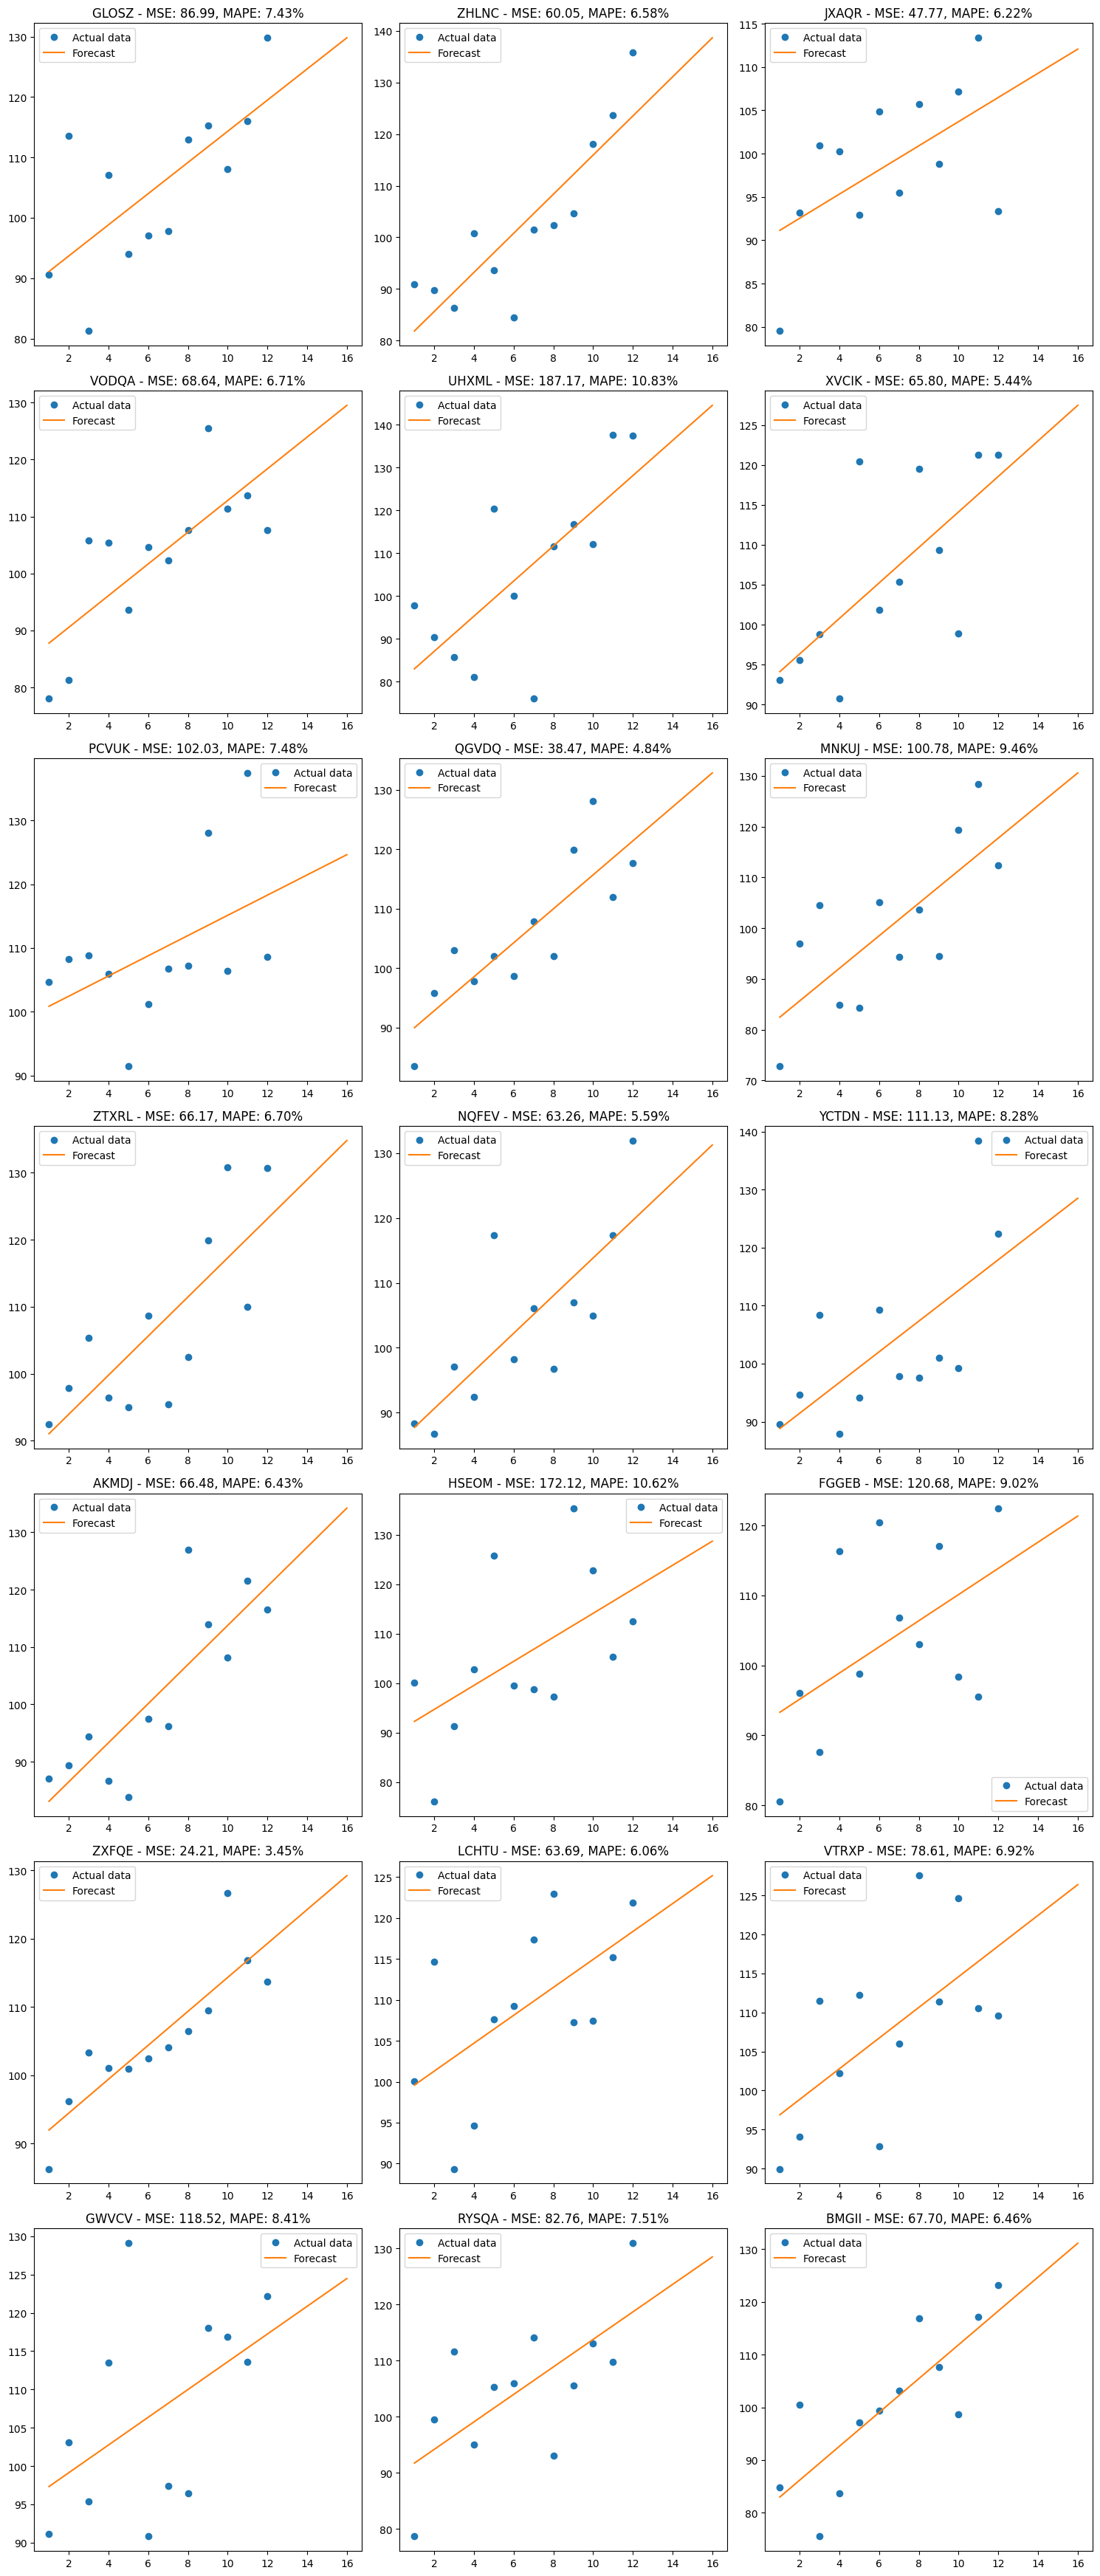

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

file_path = '/Users/elsaahmed/Desktop/productdemand.csv'
df = pd.read_csv(file_path)


def create_forecasts(data, products):
    rows = len(products) // 3 + (1 if len(products) % 3 > 0 else 0)
    fig, axs = plt.subplots(rows, 3, figsize=(15, rows * 5))
    axs = axs.flatten()

    for i, product in enumerate(products):
        product_data = data[data['Product Number'] == product]
        x = product_data['Month Num'].values.reshape(-1, 1)
        y = product_data['Adjusted Predicted Demand'].values
        
       
        model = LinearRegression()
        model.fit(x, y)

        # Predictions
        x_forecast = np.array(range(1, 17)).reshape(-1, 1)
        y_forecast = model.predict(x_forecast)

        # Calculating MSE and MAPE
        y_true = product_data['Adjusted Predicted Demand']
        y_pred = model.predict(x)
        mse = mean_squared_error(y_true, y_pred)
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

        # Plotting on a subplot
        axs[i].plot(x, y, 'o', label='Actual data')
        axs[i].plot(x_forecast, y_forecast, '-', label='Forecast')
        axs[i].set_title(f"{product} - MSE: {mse:.2f}, MAPE: {mape:.2f}%")
        axs[i].legend()

 
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.savefig('/mnt/data/all_forecasts.png')
    plt.close()


products = ["GLOSZ", "ZHLNC", "JXAQR", "VODQA", "UHXML", "XVCIK", "PCVUK", "QGVDQ", "MNKUJ", "ZTXRL",
            "NQFEV", "YCTDN", "AKMDJ", "HSEOM", "FGGEB", "ZXFQE", "LCHTU", "VTRXP", "GWVCV", "RYSQA", "BMGII"]


create_forecasts(demand_data, products)
